<a href="https://colab.research.google.com/github/Pancerro/MachineLearning/blob/master/lab9/lab9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
width=600, height=800, depth=3
Podstawowy obraz


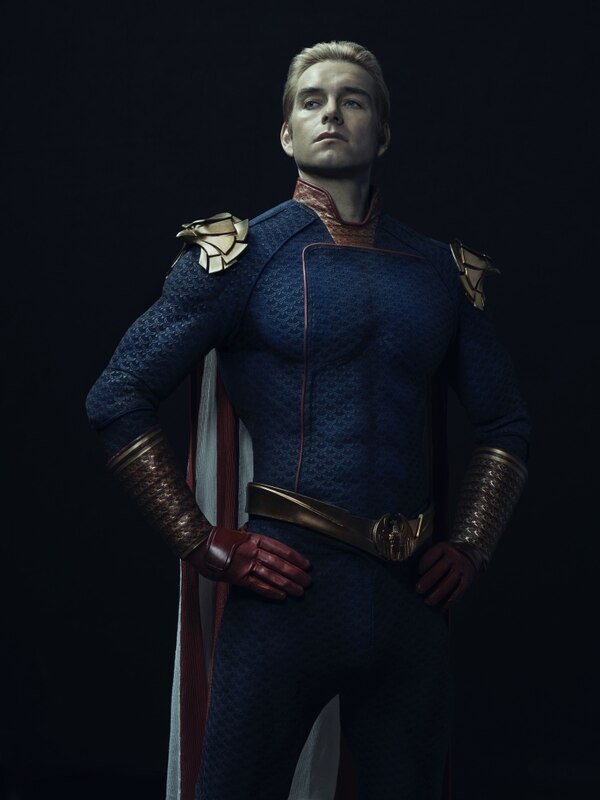

R=11, G=14, B=21
ROI - Wyobrobnienie fragmentu zainteresowania - ROI, w tym przypadku wspołrzednie odogrnie ustalone


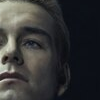

Rezise - Zmiana wielkosci obrazu bez uzwglednienia proporcji


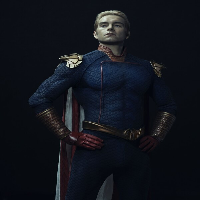

Rezise - Zmiana wielkosci obrazu po obliczeniu proporcji


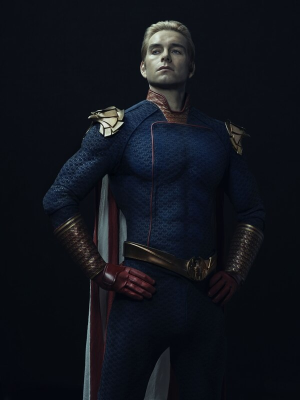

imutils.resize - Zmiana wielkosci obrazu po uzyciu imutils - zmienia wielkosc propocjonalnie, uzwgledniajac jaka chcemy szerokosc


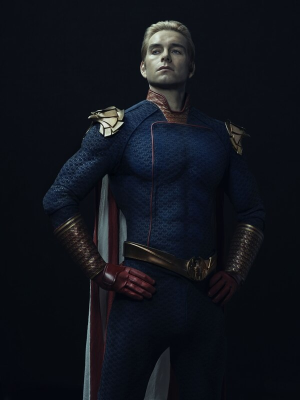

Obrocenie obrazu obliczając jego srodek


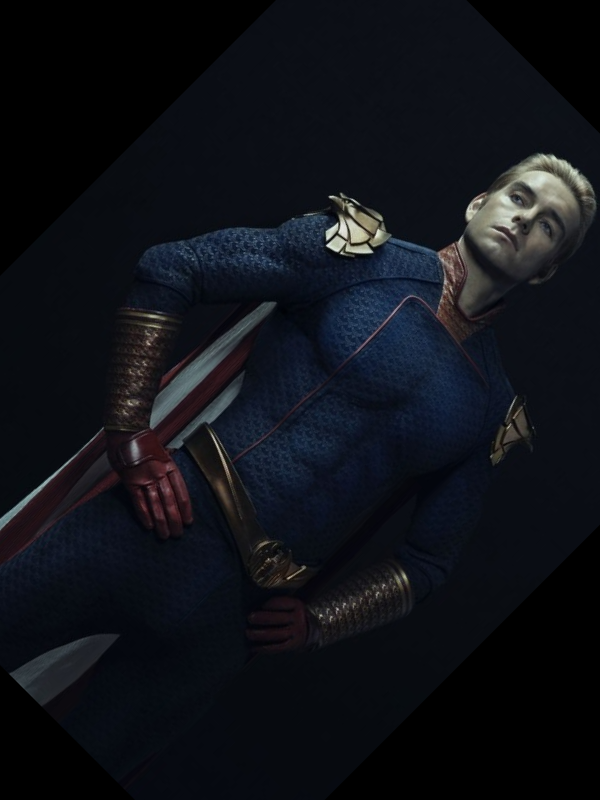

imutils.rotate_bound - Obrocenie obrazu uzywając imutils - niestety to nadal obcina obraz


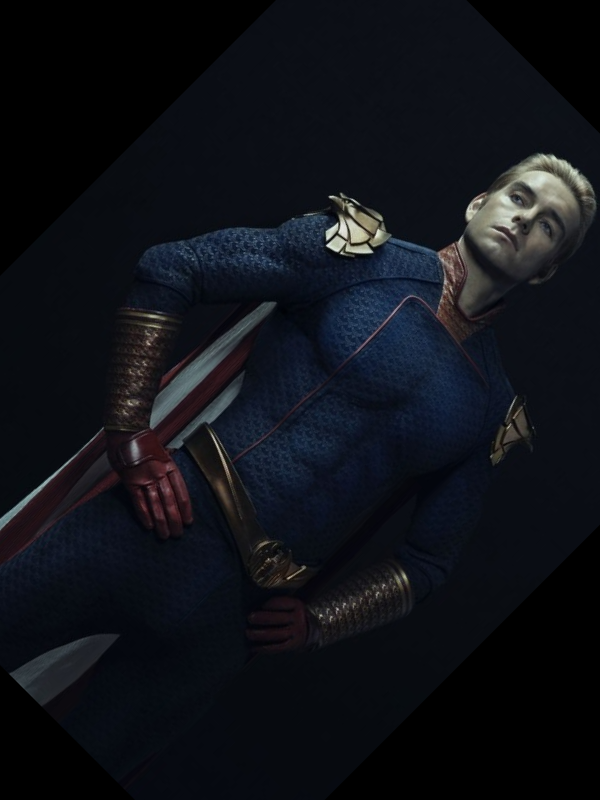

imutils.rotate_bound - Obrocenie obrazu - jednakze teraz pojawi sie cały obraz bez ucinaania


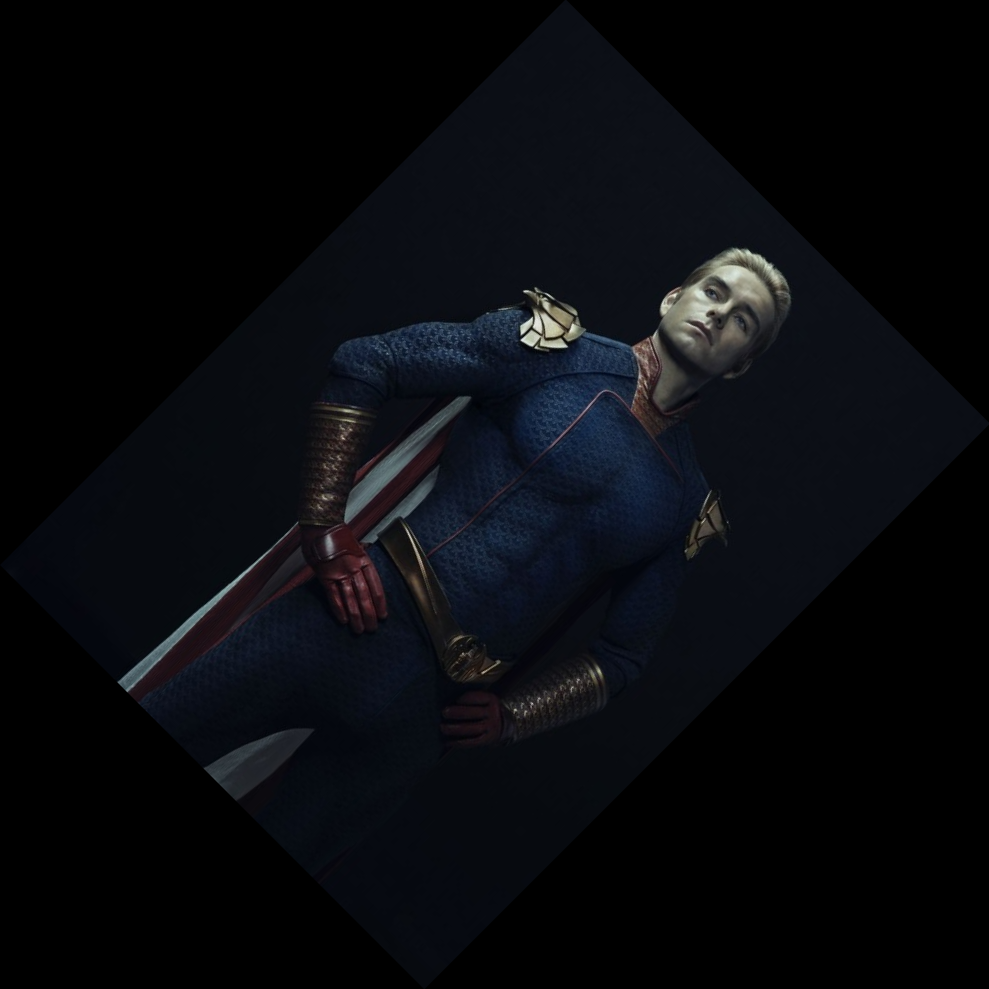

GaussianBlur - Rozmycie obrazu


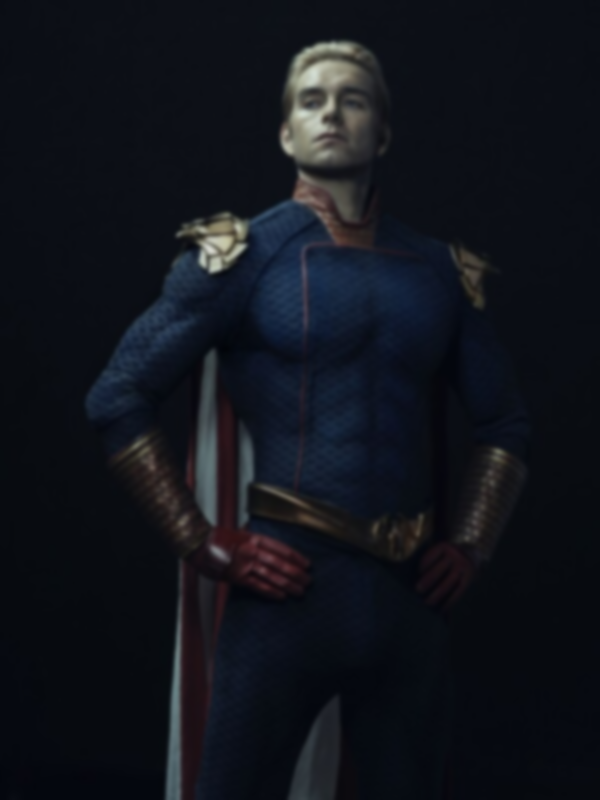

rectangle -Rysowanie prostokata na obrazie


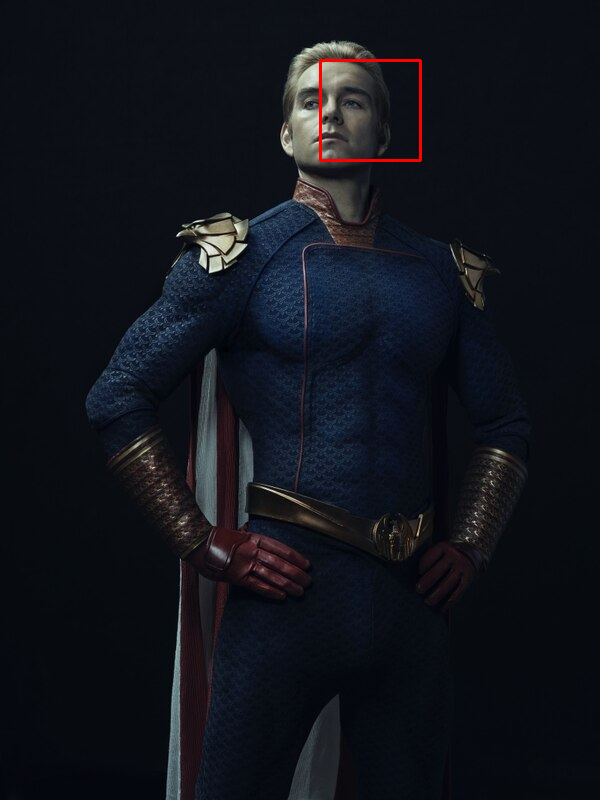

circle - Rysowanie kolka na obrazie


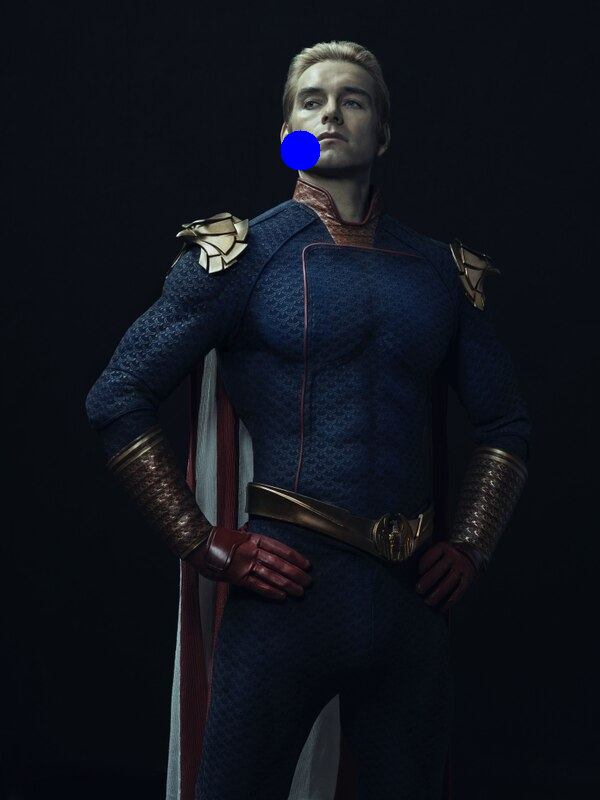

line -Rysowanie linni na obrazie


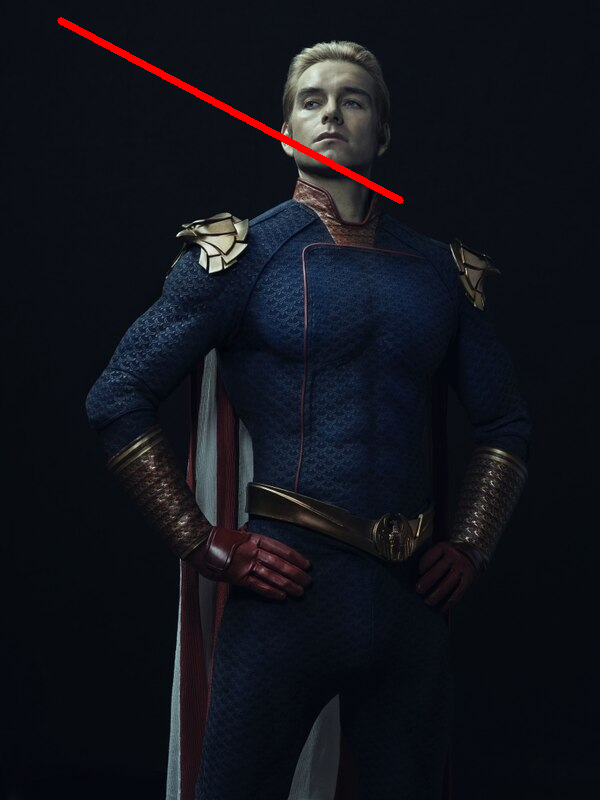

putText - Umieszczenie tekstu na obrazie 


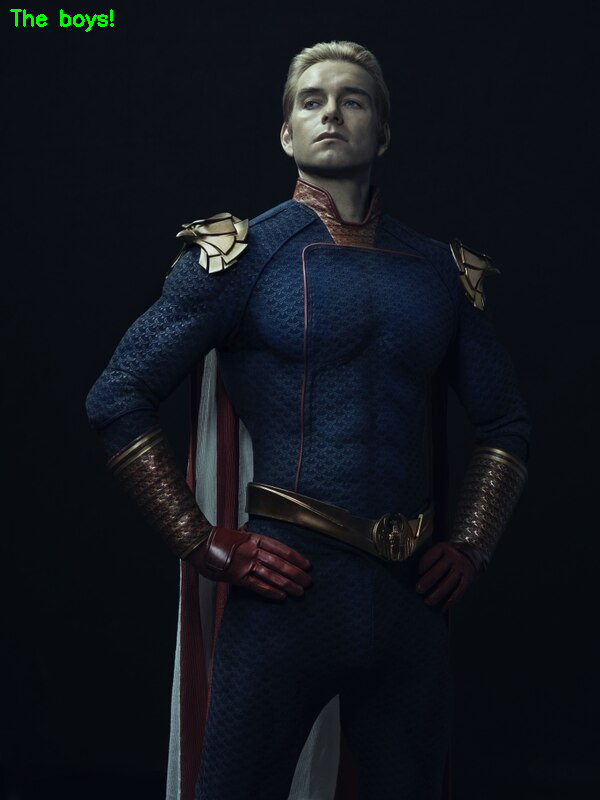

cvtColor - Konwersja obrazu na szary


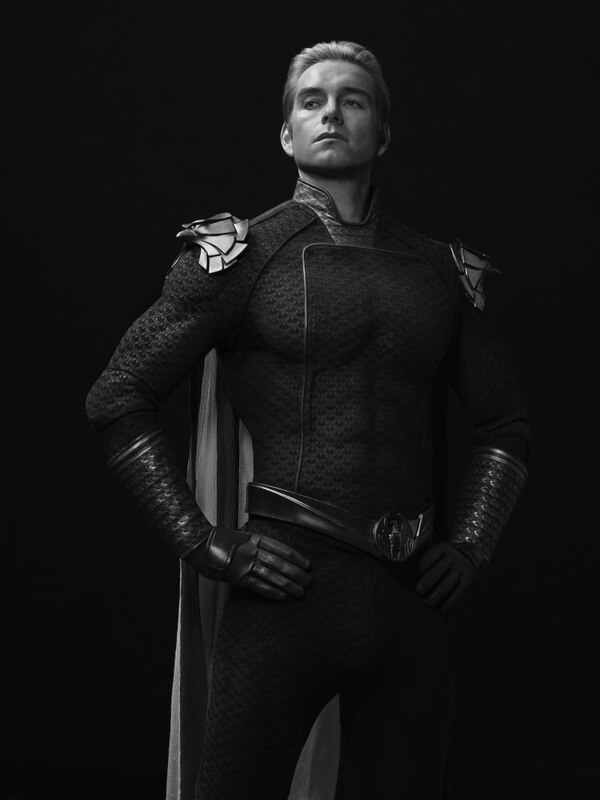

Canny - wykrywanie krawedzi


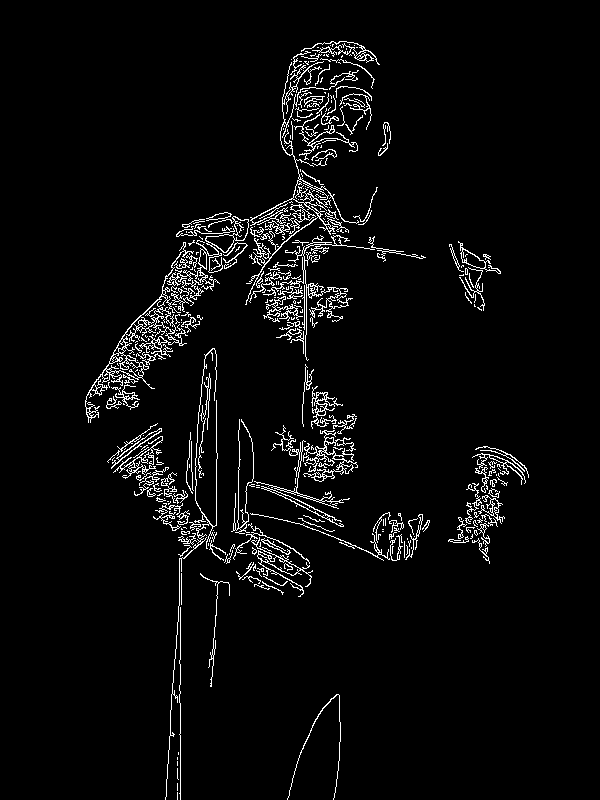

threshold - Oddzielenie pierwszego planu od tła za pomocą obrazu binarnego 


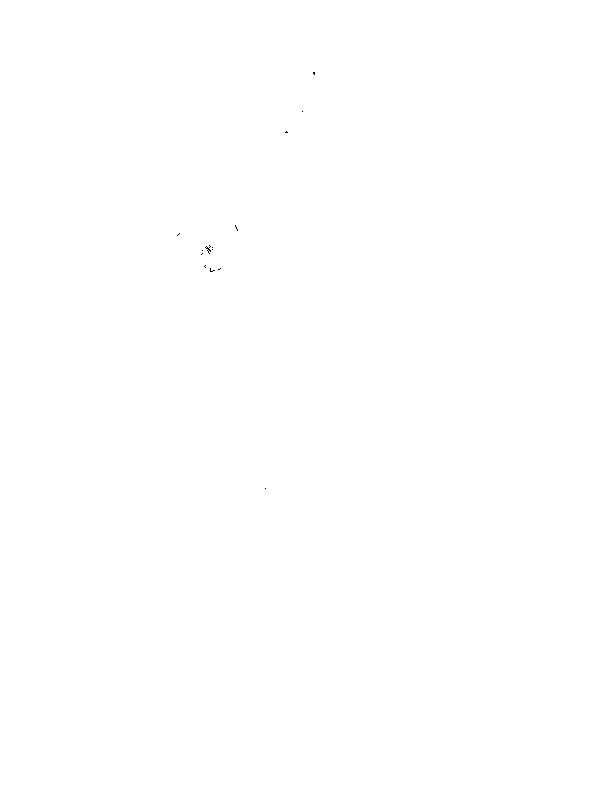

findContours - wykrywanie konturow


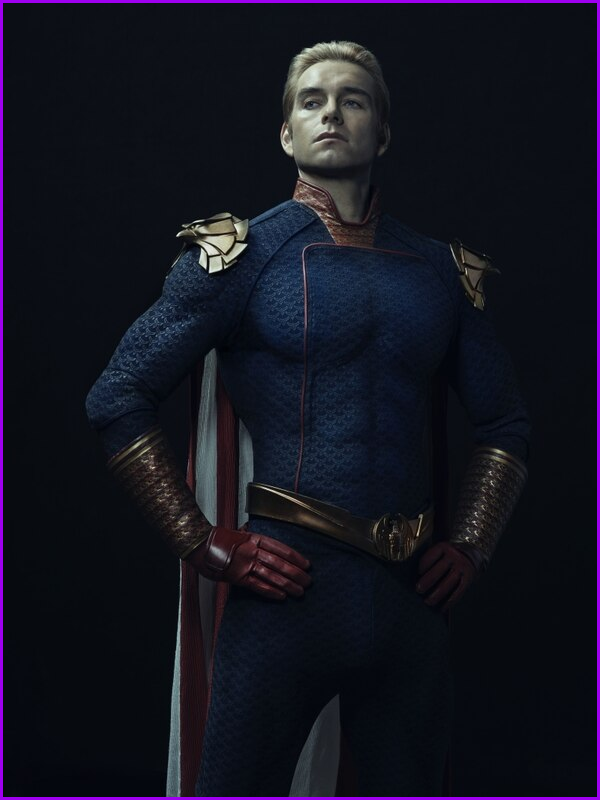

Liczenie obiektow ktorych kontury zostaly wykryre


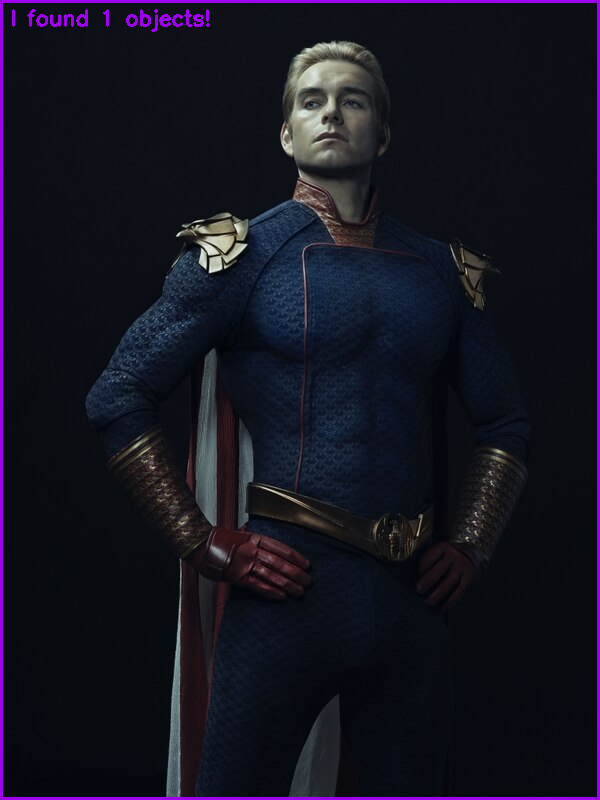

Zmiana wielkosci obiektów na obrazku


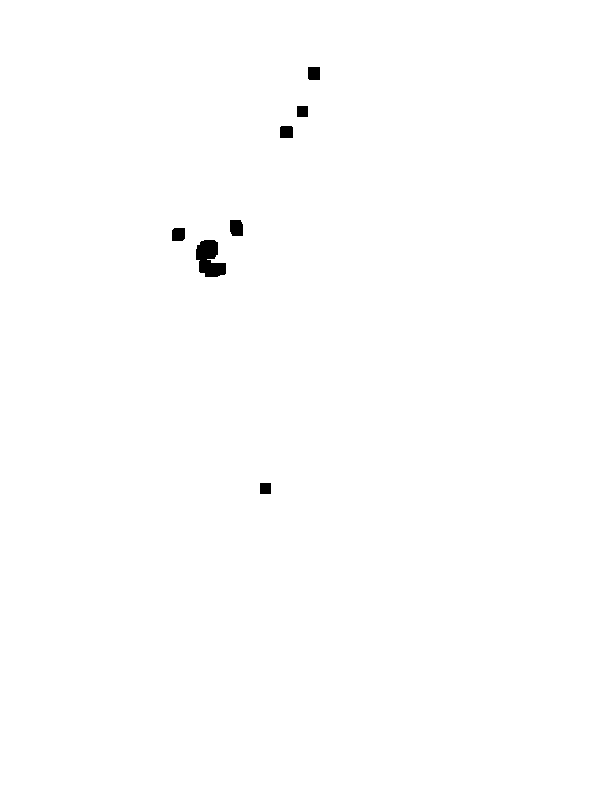

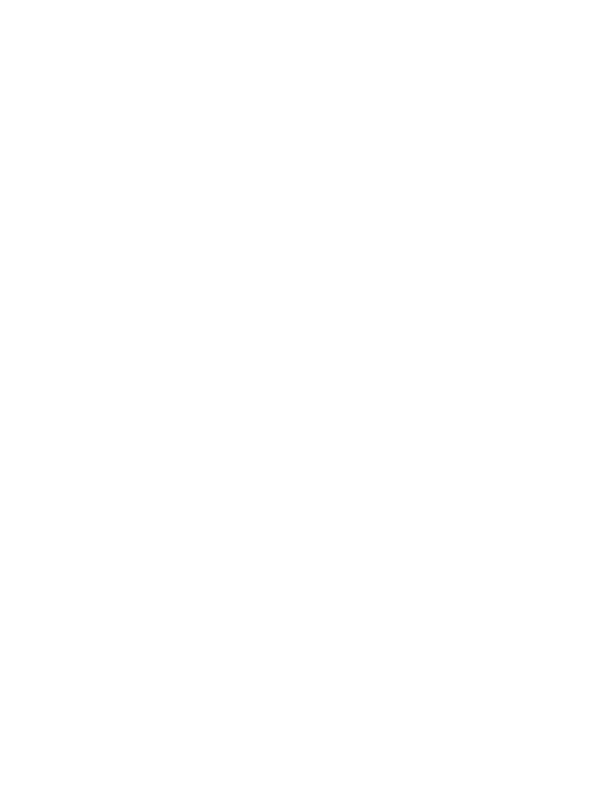

Zamaskowanie obszaru który nas nie interesuje


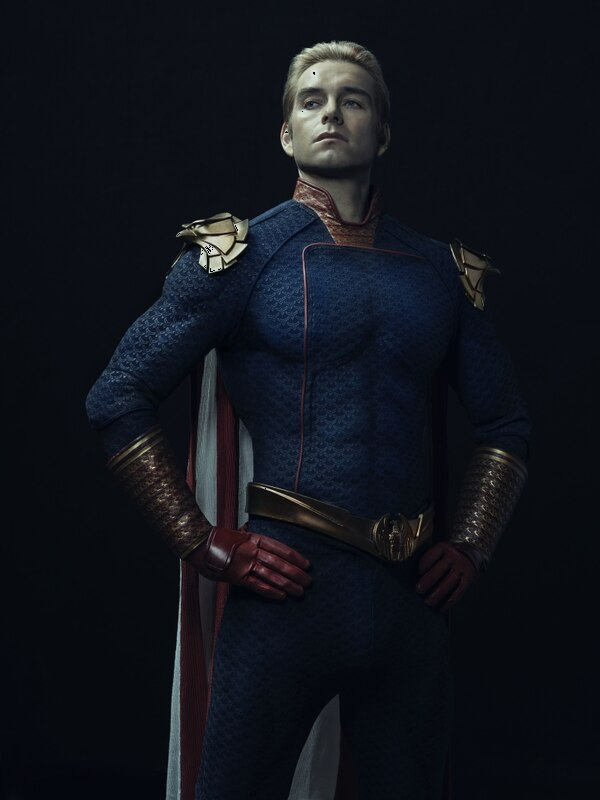

In [61]:
import imutils
import cv2
from google.colab.patches import cv2_imshow
from google.colab import drive
drive.mount('/content/drive')
from google.colab import files
from IPython.display import Image
Image('Homelander_S2 (1).jpg')
image = cv2.imread('Homelander_S2 (1).jpg')
(h, w, d) = image.shape
print("width={}, height={}, depth={}".format(w, h, d)) 
print("Podstawowy obraz")
cv2_imshow(image)
(B, G, R) = image[100, 50]
print("R={}, G={}, B={}".format(R, G, B))
roi = image[60:160, 320:420]
print("ROI - Wyobrobnienie fragmentu zainteresowania - ROI, w tym przypadku wspołrzednie odogrnie ustalone")
cv2_imshow(roi)
resized = cv2.resize(image, (200, 200))
print("Rezise - Zmiana wielkosci obrazu bez uzwglednienia proporcji")
cv2_imshow(resized)
r = 300.0 / w
dim = (300, int(h * r))
resized = cv2.resize(image, dim)
print("Rezise - Zmiana wielkosci obrazu po obliczeniu proporcji")
cv2_imshow(resized)
resized = imutils.resize(image, width=300)
print("imutils.resize - Zmiana wielkosci obrazu po uzyciu imutils - zmienia wielkosc propocjonalnie, uzwgledniajac jaka chcemy szerokosc")
cv2_imshow(resized)
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, -45, 1.0)
rotated = cv2.warpAffine(image, M, (w, h))
print("Obrocenie obrazu obliczając jego srodek")
cv2_imshow(rotated)
rotated = imutils.rotate(image, -45)
print("imutils.rotate_bound - Obrocenie obrazu uzywając imutils - niestety to nadal obcina obraz")
cv2_imshow(rotated)
rotated = imutils.rotate_bound(image, 45)
print("imutils.rotate_bound - Obrocenie obrazu - jednakze teraz pojawi sie cały obraz bez ucinaania")
cv2_imshow(rotated)
blurred = cv2.GaussianBlur(image, (11, 11), 0)
print("GaussianBlur - Rozmycie obrazu")
cv2_imshow(blurred)
output = image.copy()
cv2.rectangle(output, (320, 60), (420, 160), (0, 0, 255), 2)
print("rectangle -Rysowanie prostokata na obrazie")
cv2_imshow(output)
output = image.copy()
cv2.circle(output, (300, 150), 20, (255, 0, 0), -1)
print("circle - Rysowanie kolka na obrazie")
cv2_imshow(output)
output = image.copy()
cv2.line(output, (60, 20), (400, 200), (0, 0, 255), 5)
print("line -Rysowanie linni na obrazie")
cv2_imshow(output)
output = image.copy()
cv2.putText(output, "The boys!", (10, 25), 
	cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
print("putText - Umieszczenie tekstu na obrazie ")
cv2_imshow(output)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print("cvtColor - Konwersja obrazu na szary")
cv2_imshow(gray)
edged = cv2.Canny(gray, 30, 150)
print("Canny - wykrywanie krawedzi")
cv2_imshow(edged)
thresh = cv2.threshold(gray, 225, 255, cv2.THRESH_BINARY_INV)[1]
print("threshold - Oddzielenie pierwszego planu od tła za pomocą obrazu binarnego ")
cv2_imshow(thresh)
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
output = image.copy()
print("findContours - wykrywanie konturow")
for c in cnts:
	cv2.drawContours(output, [c], -1, (240, 0, 159), 3)
	cv2_imshow(output)
text = "I found {} objects!".format(len(cnts))
cv2.putText(output, text, (10, 25),  cv2.FONT_HERSHEY_SIMPLEX, 0.7,
	(240, 0, 159), 2)
print("Liczenie obiektow ktorych kontury zostaly wykryre")
cv2_imshow(output)
mask = thresh.copy()
mask = cv2.erode(mask, None, iterations=5)
print("Zmiana wielkosci obiektów na obrazku")
cv2_imshow(mask)
mask = thresh.copy()
mask = cv2.dilate(mask, None, iterations=5)
cv2_imshow(mask)
mask = thresh.copy()
output = cv2.bitwise_and(image, image, mask=mask)
print("Zamaskowanie obszaru który nas nie interesuje")
cv2_imshow(output)
